# Assignment 6.2

## Assignment 6.2.a
Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. Do not use dropout or data-augmentation in this part. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [1]:
import keras
import tensorflow as tf
import os
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator

import sklearn.metrics as metrics
from seaborn import heatmap

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Data Exploration

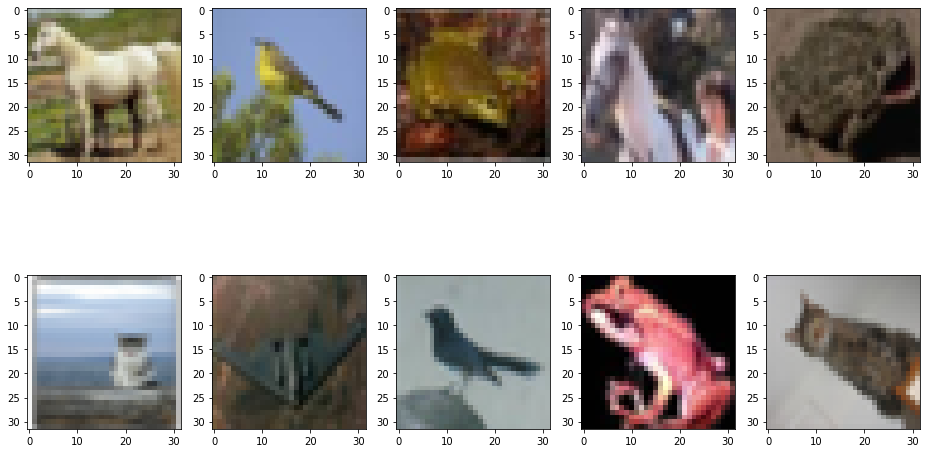

In [3]:
axs = [f'ax{i}' for i in range(0,10)]

fig, [axs[0:5], 
      axs[5:10]] = plt.subplots(2,5, figsize=(16,9))

for ax in axs:
    ax.imshow(X_train[np.random.randint(0,10000)])
    
plt.show()

In [4]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


## Data Preprocessing

In [5]:
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.astype('float32')
X_test /= 255

X_val_train = X_train[:10000]
X_train = X_train[10000:]

# Convert target data to single array of shape (50000,) and (10000,)
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

y_val_train = y_train[:10000]
y_train = y_train[10000:]

## ConvNet Model

In [6]:
batch_size = 128
epochs = 200

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Dense, Flatten

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 padding='same', 
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['acc'])

In [10]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs = epochs, 
                    validation_data=(X_val_train, y_val_train), 
                    verbose=False)

313/313 [==============================] - 2s 5ms/step - loss: 2.3716 - acc: 0.6730
[2.371561050415039, 0.6729999780654907]


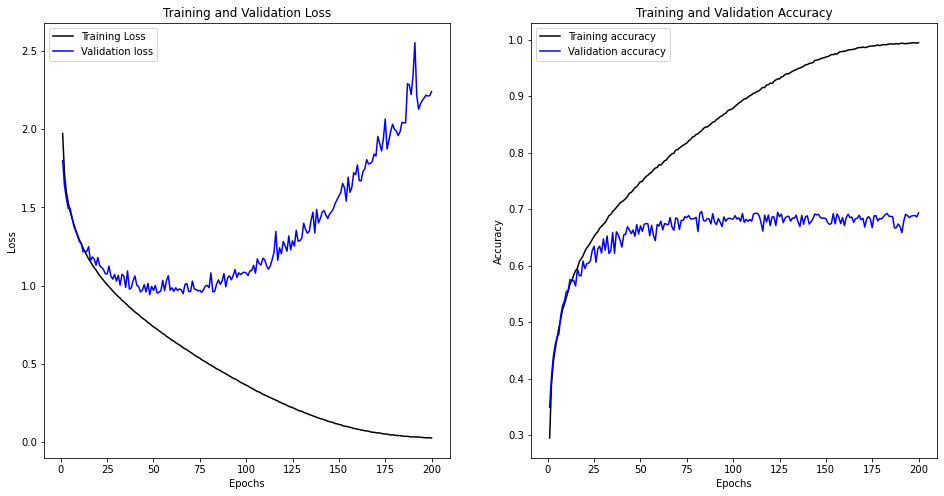

In [11]:
results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,8))

ax1.plot(epochs, loss_values,  'k', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'k', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
plt.show()

In [12]:
batch_size = 128
epochs = 60

model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 padding='same', 
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['acc'])

history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs = epochs, 
                    validation_data=(X_val_train, y_val_train), 
                    verbose=False)

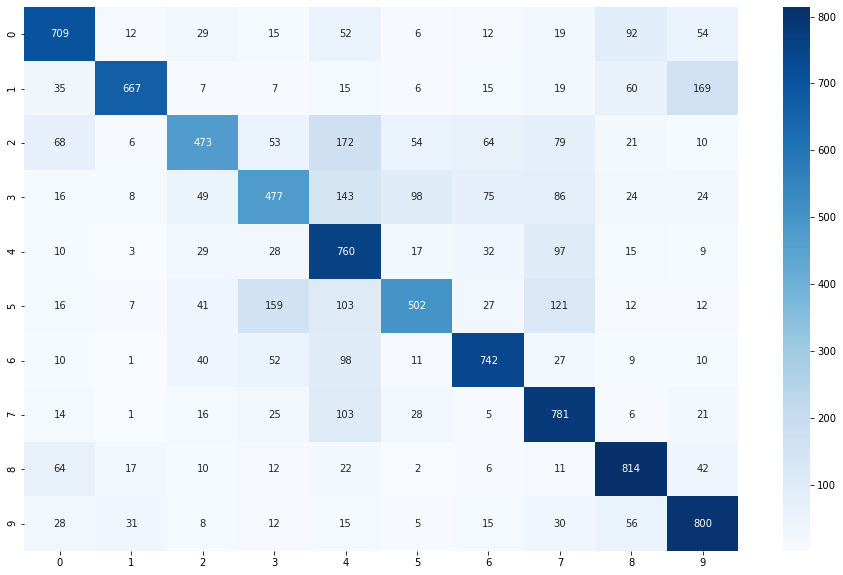

In [13]:
predictions = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predictions.argmax(axis=1))
fig, ax = plt.subplots(figsize=(16,10))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax);

In [14]:
predictions.argmax(axis = 1).shape

(10000,)

In [15]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

df = pd.DataFrame()
df['prediction'] = predictions.argmax(axis=1)
df['actual'] = y_test
df['prediction'] = df['prediction'].apply(lambda x: labels[x])
df['actual'] = df['actual'].apply(lambda x: labels[x])
df.to_csv("results/model_6_a_predictions.csv")
df.sample(20)

,prediction,actual
1384,Truck,Truck
1264,Ship,Ship
7653,Ship,Ship
2146,Bird,Bird
4286,Bird,Bird
3676,Truck,Truck
8386,Cat,Cat
7997,Truck,Automobile
2335,Deer,Dog
2559,Horse,Horse


In [16]:
model.save('results/model_6_2_a.h5')

## Assignment 6.2.b
Using section 5.2 in Deep Learning with Python as a guide, create a ConvNet model that classifies images CIFAR10 small images classification dataset. This time includes dropout and data-augmentation. Save the model, predictions, metrics, and validation plots in the dsc650/assignments/assignment06/results directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)       

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['acc'])

In [19]:
batch_size = 128
epochs = 300

In [20]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

history = model.fit(datagen.flow(X_train, 
                                 y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val_train, y_val_train),
                    workers=4, 
                    verbose=False)

313/313 [==============================] - 2s 8ms/step - loss: 0.8179 - acc: 0.7187
[0.8179059028625488, 0.7186999917030334]


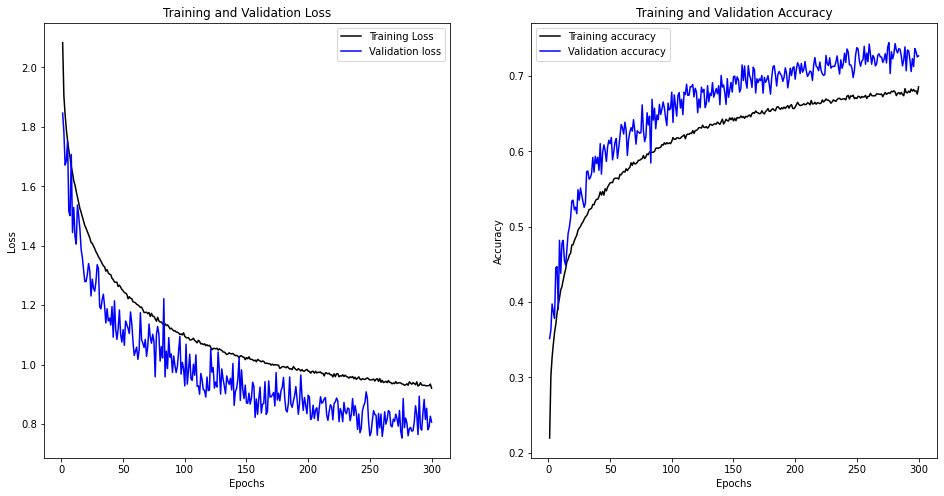

In [21]:
results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,8))

ax1.plot(epochs, loss_values,  'k', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'k', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
plt.show()

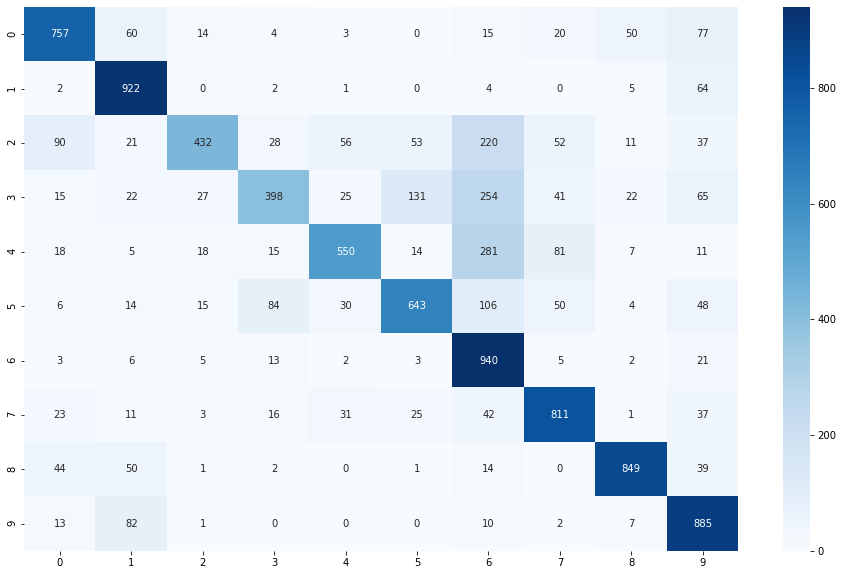

In [22]:
predictions = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predictions.argmax(axis=1))
fig, ax = plt.subplots(figsize=(16,10))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax);

In [23]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

df = pd.DataFrame()
df['prediction'] = predictions.argmax(axis=1)
df['actual'] = y_test
df['prediction'] = df['prediction'].apply(lambda x: labels[x])
df['actual'] = df['actual'].apply(lambda x: labels[x])
df.to_csv("results/model_6_b_predictions.csv")
df.sample(20)

,prediction,actual
9811,Automobile,Automobile
2368,Airplane,Airplane
9518,Truck,Truck
4599,Automobile,Ship
2648,Deer,Deer
1234,Automobile,Automobile
8059,Cat,Cat
780,Truck,Truck
6877,Ship,Airplane
131,Automobile,Automobile


In [24]:
model.save('results/model_6_2_b.h5')